In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from warnings import filterwarnings    
filterwarnings(action='ignore')   

In [2]:
accidents = pd.read_csv('accidents.csv')

In [3]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AccidentDate      50000 non-null  object
 1   Timing            50000 non-null  object
 2   State             50000 non-null  object
 3   WeatherCondition  50000 non-null  object
 4   RoadCondition     50000 non-null  object
 5   Deaths            50000 non-null  int64 
 6   Reason            50000 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.7+ MB


In [4]:
accidents.describe()

,Deaths
count,50000.000000
mean,4.983040
std,3.160581
min,0.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,10.000000


In [17]:
accidents.isnull().sum()

AccidentDate        0
Timing              0
State               0
WeatherCondition    0
RoadCondition       0
Deaths              0
Reason              0
dtype: int64

In [20]:
accidents

,AccidentDate,Timing,State,WeatherCondition,RoadCondition,Deaths,Reason
0,04-02-2013,Morning,Alaska,Rainy,Under Construction,10,Drunk Driving
1,23-02-2005,Night,Arizona,Clear,Under Construction,3,Weather Conditions
2,08-10-2014,Afternoon,California,Clear,Fine,6,Poor Visibility
3,14-01-2015,Night,Colorado,Rainy,Rough,8,Road Conditions
4,17-01-2006,Afternoon,Georgia,Clear,Fine,2,Speeding
...,...,...,...,...,...,...,...
49995,20-08-2002,Night,Virginia,Clear,Under Construction,2,Mechanical Failure
49996,15-05-2012,Night,Virginia,Clear,Under Construction,0,Mechanical Failure
49997,19-05-2007,Evening,North Carolina,Rainy,Under Construction,2,Driver Fatigue
49998,04-08-2019,Night,South Carolina,Clear,Fine,0,Distracted Driving


In [18]:
accidents.shape

(50000, 7)

In [19]:
accidents.columns

Index(['AccidentDate', 'Timing', 'State', 'WeatherCondition', 'RoadCondition',
       'Deaths', 'Reason'],
      dtype='object')

In [21]:
accidents.nunique()

AccidentDate        8734
Timing                 4
State                 28
WeatherCondition       3
RoadCondition          3
Deaths                11
Reason                 9
dtype: int64

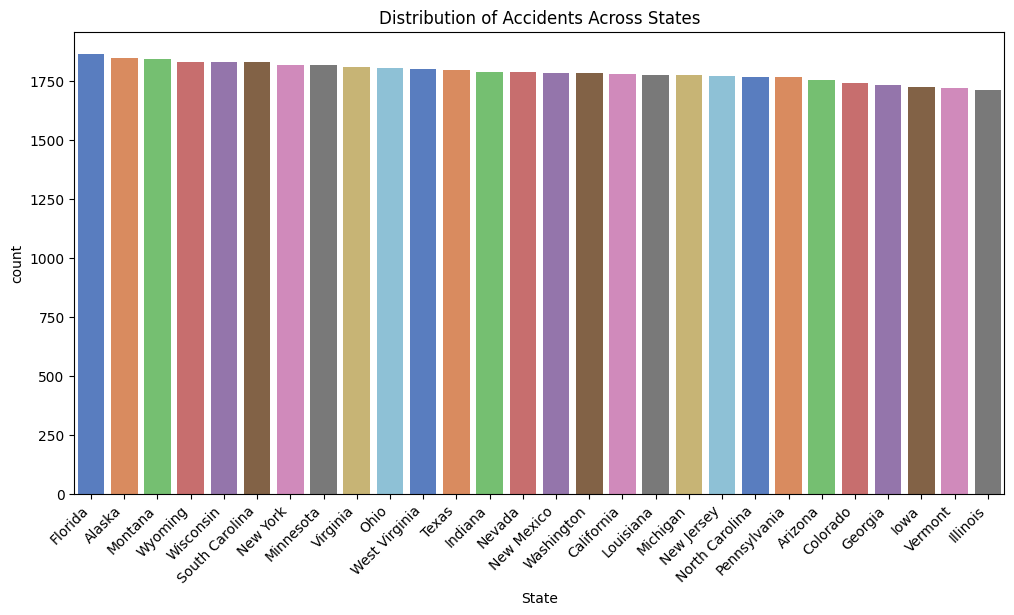

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(x="State", data=accidents, order=accidents['State'].value_counts().index , palette ="muted")
plt.title("Distribution of Accidents Across States")
plt.xticks(rotation=45, ha="right")
plt.show()

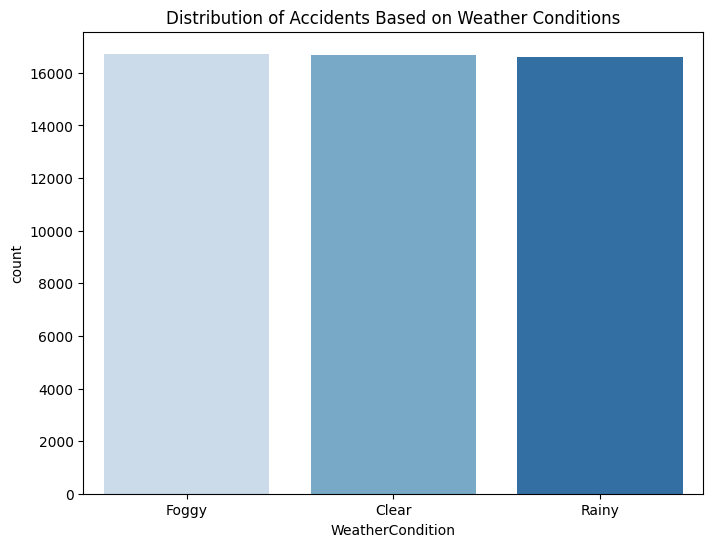

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x="WeatherCondition", data=accidents, order=accidents['WeatherCondition'].value_counts().index , palette = "Blues")
plt.title("Distribution of Accidents Based on Weather Conditions")
plt.show()

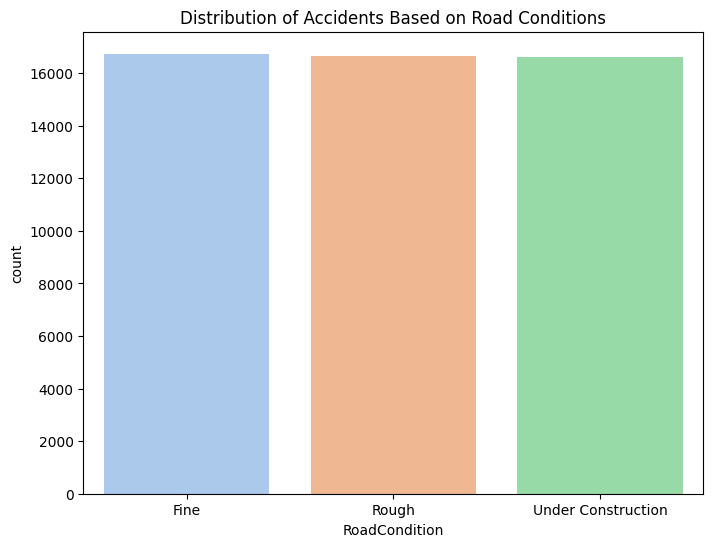

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x="RoadCondition", data=accidents, order=accidents['RoadCondition'].value_counts().index , palette = "pastel")
plt.title("Distribution of Accidents Based on Road Conditions")
plt.show()

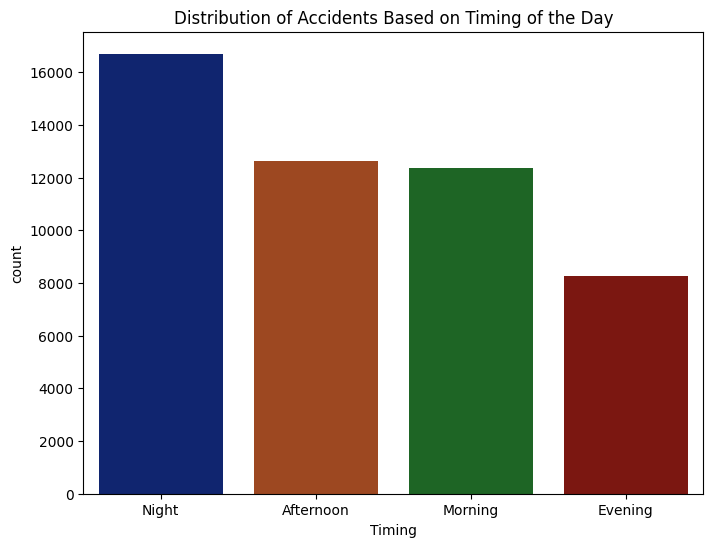

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Timing", data=accidents, order=accidents['Timing'].value_counts().index , palette = "dark")
plt.title("Distribution of Accidents Based on Timing of the Day")
plt.show()

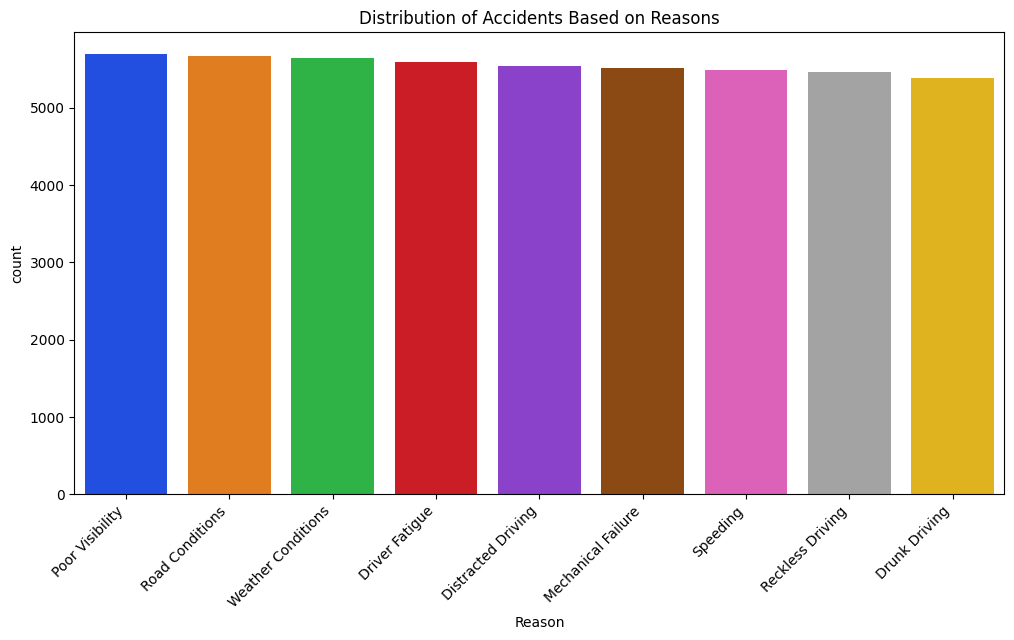

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Reason", data=accidents, order=accidents['Reason'].value_counts().index , palette = "bright")
plt.title("Distribution of Accidents Based on Reasons")
plt.xticks(rotation=45, ha="right")
plt.show()

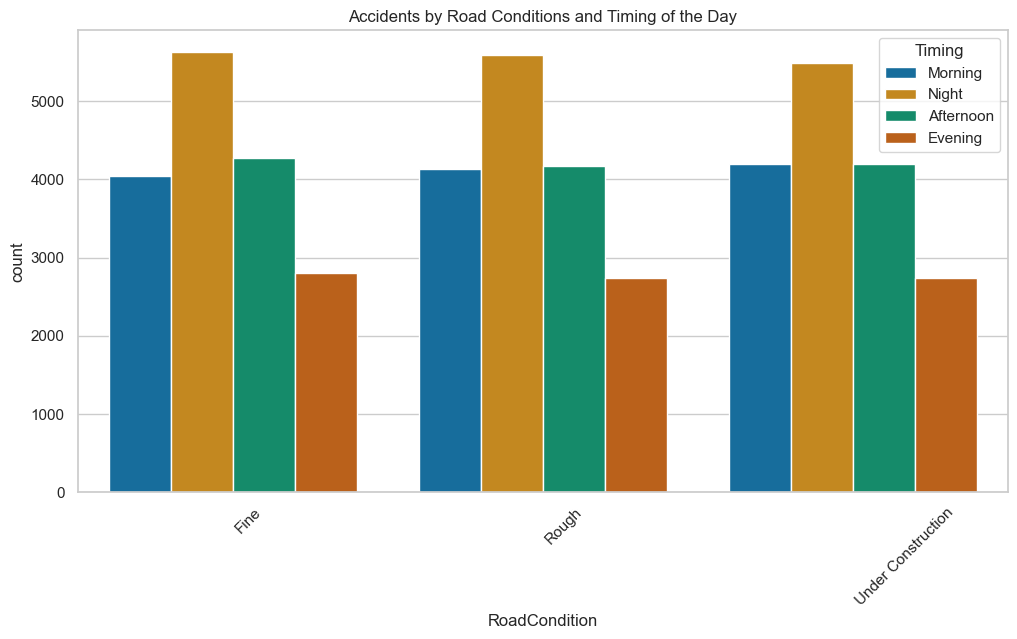

In [10]:
import matplotlib.pyplot as plt


# Set the style for seaborn plots
sns.set(style="whitegrid")

# Explore patterns related to road conditions
plt.figure(figsize=(12, 6))
sns.countplot(x="RoadCondition", hue="Timing", data=accidents, order=accidents['RoadCondition'].value_counts().index , palette = "colorblind")
plt.title("Accidents by Road Conditions and Timing of the Day")
plt.xticks(rotation=45, ha="left")
plt.show()


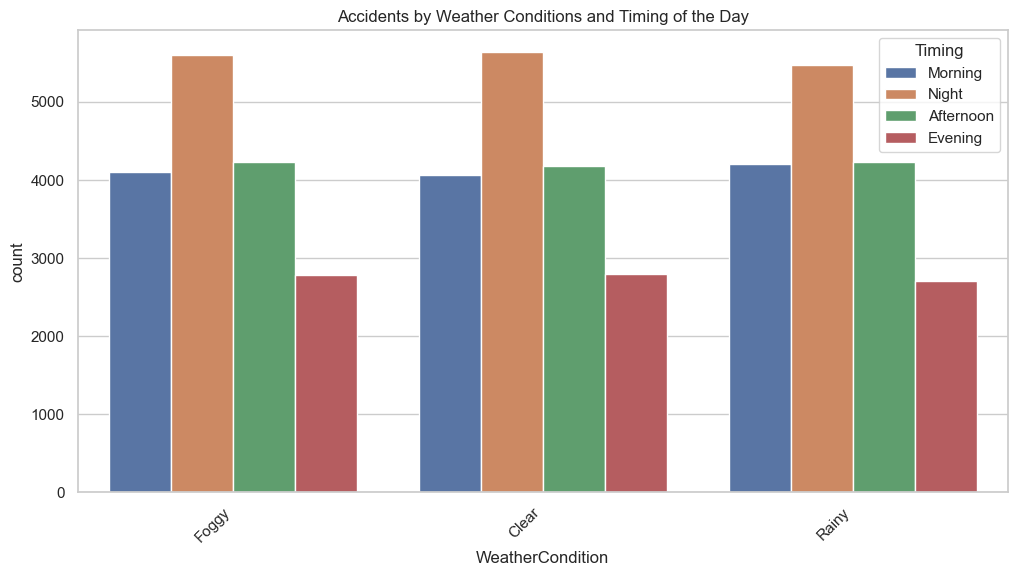

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x="WeatherCondition", hue="Timing", data=accidents, order=accidents['WeatherCondition'].value_counts().index, palette = "deep")
plt.title("Accidents by Weather Conditions and Timing of the Day")
plt.xticks(rotation = 45,ha='right')
plt.show()

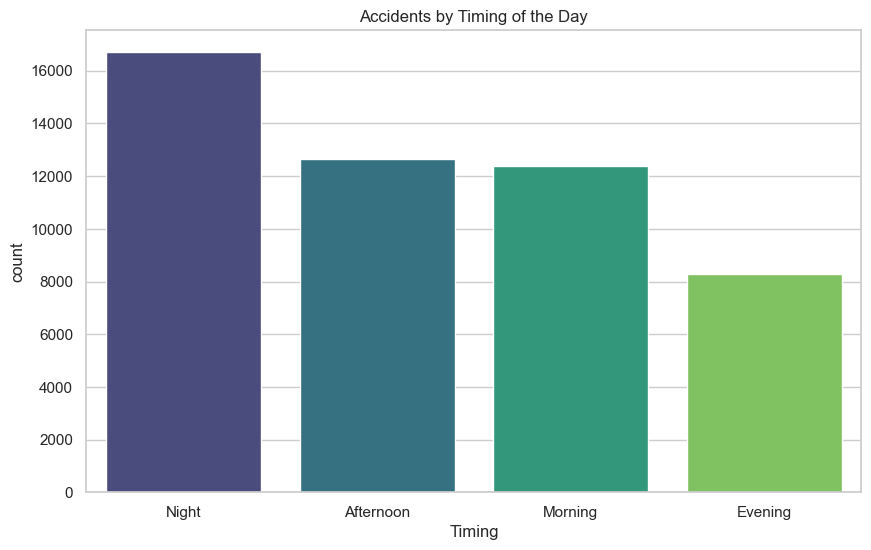

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Timing", data=accidents, order=accidents['Timing'].value_counts().index , palette ="viridis")
plt.title("Accidents by Timing of the Day")
plt.show()

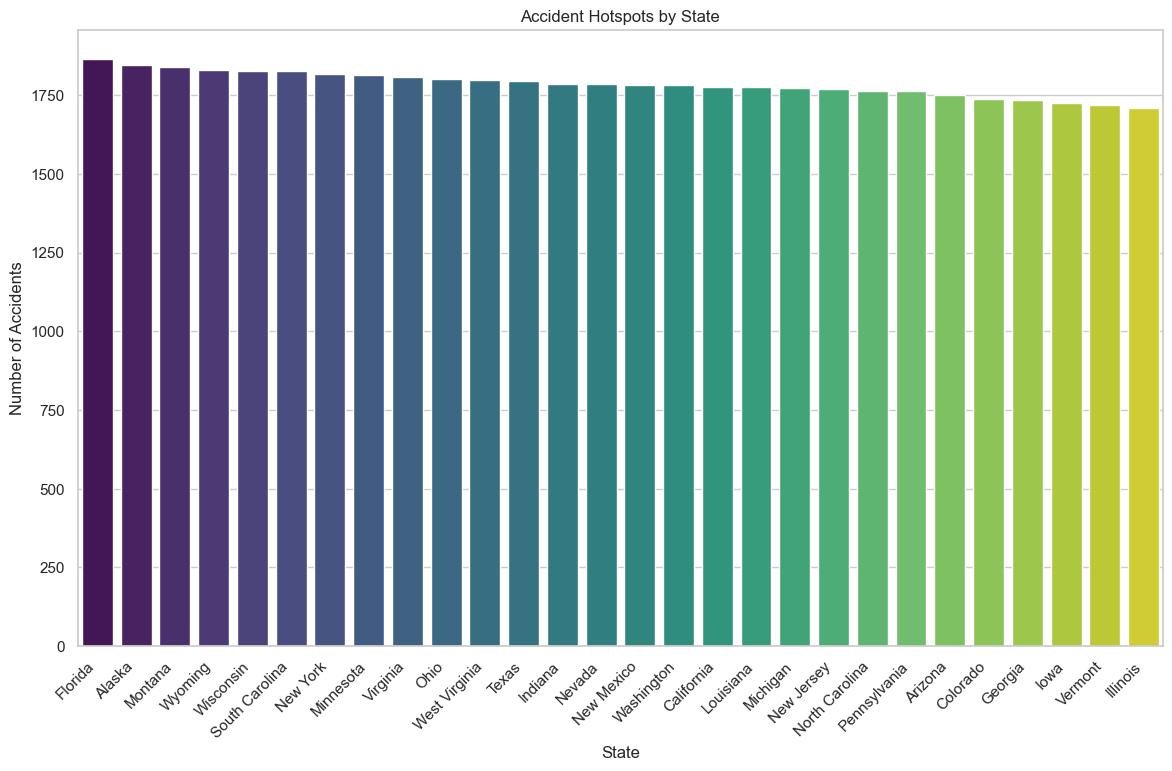

In [13]:
sns.set(style="whitegrid")

# Visualize accident hotspots (States with higher accident frequencies)
plt.figure(figsize=(14, 8))
state_accidents = accidents['State'].value_counts()
sns.barplot(x=state_accidents.index, y=state_accidents.values, palette="viridis")
plt.title("Accident Hotspots by State")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

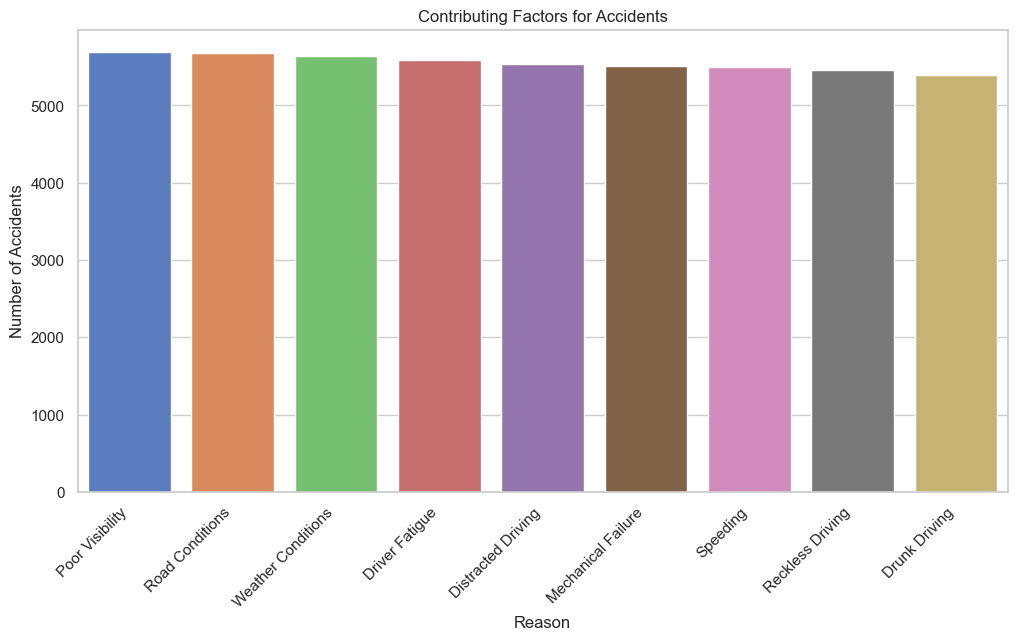

In [14]:
plt.figure(figsize=(12, 6))
reasons_accidents = accidents['Reason'].value_counts()
sns.barplot(x=reasons_accidents.index, y=reasons_accidents.values, palette="muted")
plt.title("Contributing Factors for Accidents")
plt.xlabel("Reason")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

<Figure size 4500x1000 with 0 Axes>

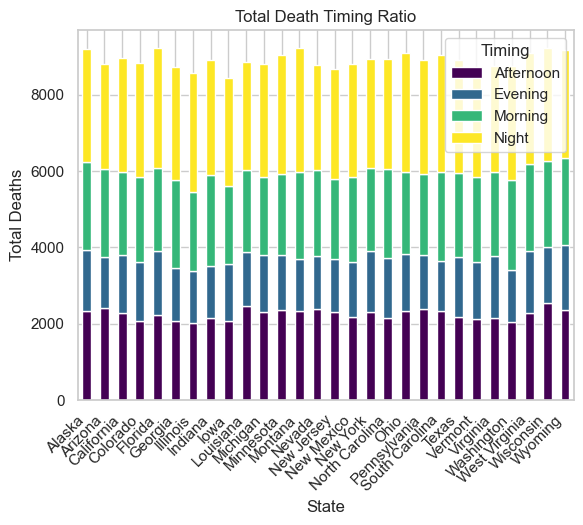

In [16]:
sns.set(style="whitegrid")

# Group the data by state and timing, and calculate the total number of deaths
state_timing_deaths = accidents.groupby(['State', 'Timing'])['Deaths'].sum().reset_index()

# Pivot the table to get a format suitable for plotting
state_timing_deaths_pivot = state_timing_deaths.pivot(index='State', columns='Timing', values='Deaths').fillna(0)

# Create a bar plot for state-wise total death timing ratio
plt.figure(figsize=(45, 10))
state_timing_deaths_pivot.plot(kind='bar', stacked=True, colormap="viridis")
plt.title("Total Death Timing Ratio")
plt.xlabel("State")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Timing")
plt.show()